## Ground Truth Test

In [2]:
import torch
import torchvision.transforms as transforms               
from torchvision.datasets import CIFAR10       
from torch.utils.data import DataLoader
import detectors
import timm
from src.temperature_scaling import ModelWithTemperature
from src.cifar10h import aps_cifar10h_hist, raps_cifar10h_hist, saps_cifar10h_hist, aps_cifar10h_scatter, raps_cifar10h_scatter, saps_cifar10h_scatter


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load fine-tuned model
model = timm.create_model("resnet34_cifar10", pretrained=True)
model.to(device)

# reprocess the images from CIFAR10
data_transform = transforms.Compose([
    transforms.ToTensor(),          # transfer to tensor
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])  # normalize
])
# load images from CIFAR10
dataset = CIFAR10(root="../data", train=False, download=True, transform=data_transform)

# Temperature Scaling
temp_scal_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = ModelWithTemperature(model, temperature=5.0).to(device)
model.set_temperature(temp_scal_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.1

Files already downloaded and verified
Before temperature - NLL: 0.327, ECE: 0.047
Optimal temperature: 4.904
After temperature - NLL: 0.882, ECE: 0.466


APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8694 ± 0.0035
Final Average Prediction Set Size: 0.97 ± 0.01
Final Average Coverage: 0.8946 ± 0.0038
Final Average Real Probability: 0.8665 ± 0.0038


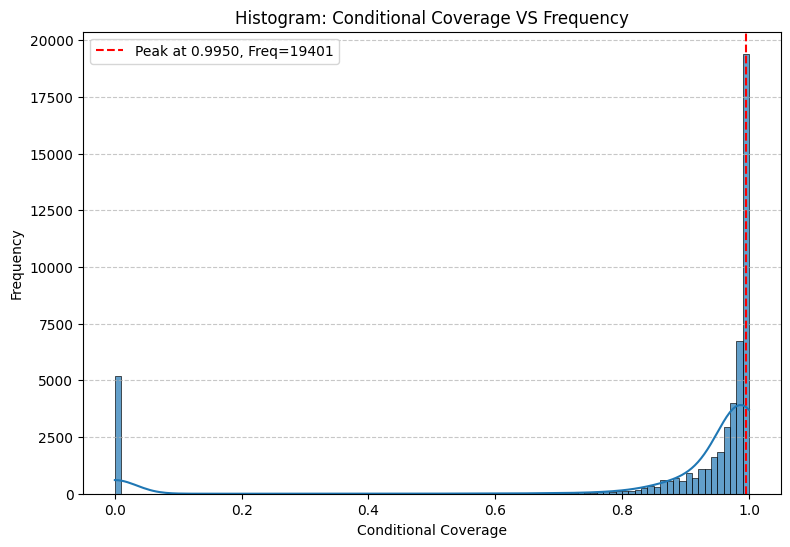

19401 (38.80%) samples reached the peak conditional coverage at 0.9950


In [3]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8697 ± 0.0034
Final Average Prediction Set Size: 0.96 ± 0.01
Final Average Coverage: 0.8946 ± 0.0039
Final Average Real Probability: 0.8656 ± 0.0039


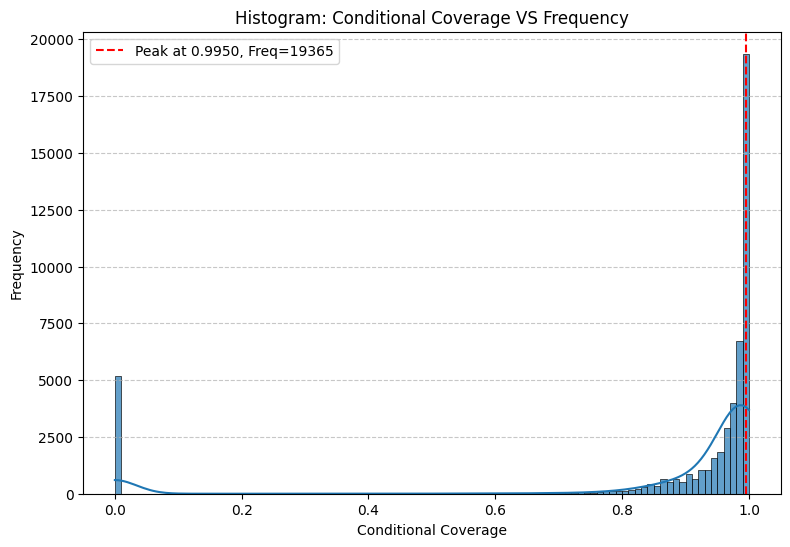

19365 (38.73%) samples reached the peak conditional coverage at 0.9950


In [4]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.01, k_reg=1, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8751 ± 0.0044
Final Average Prediction Set Size: 0.91 ± 0.00
Final Average Coverage: 0.8977 ± 0.0044
Final Average Real Probability: 0.8620 ± 0.0044


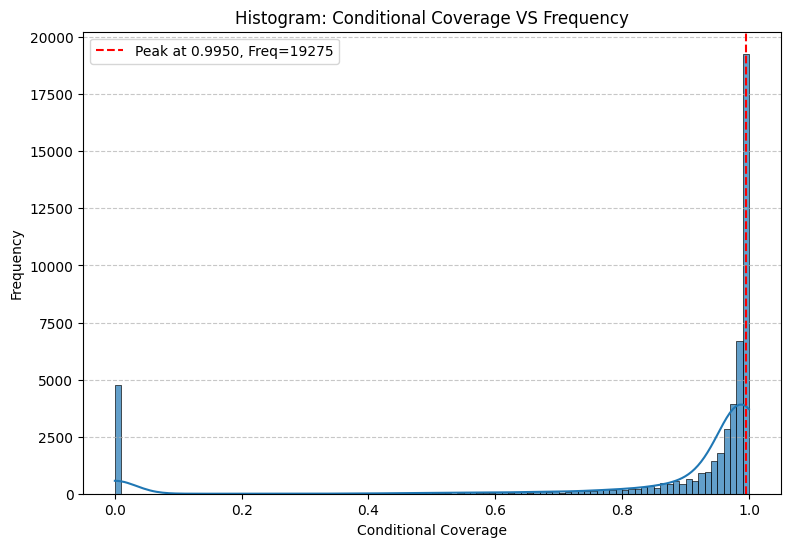

19275 (38.55%) samples reached the peak conditional coverage at 0.9950


In [5]:
saps_cifar10h_hist(model, dataset, device, lambda_=2.5, num_runs=10, alpha=0.1)

## Model Test

APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4739 ± 0.0032
Final Average Prediction Set Size: 1.22 ± 0.02
Final Average Coverage: 0.8950 ± 0.0060
Final Average Real Probability: 0.8658 ± 0.0062


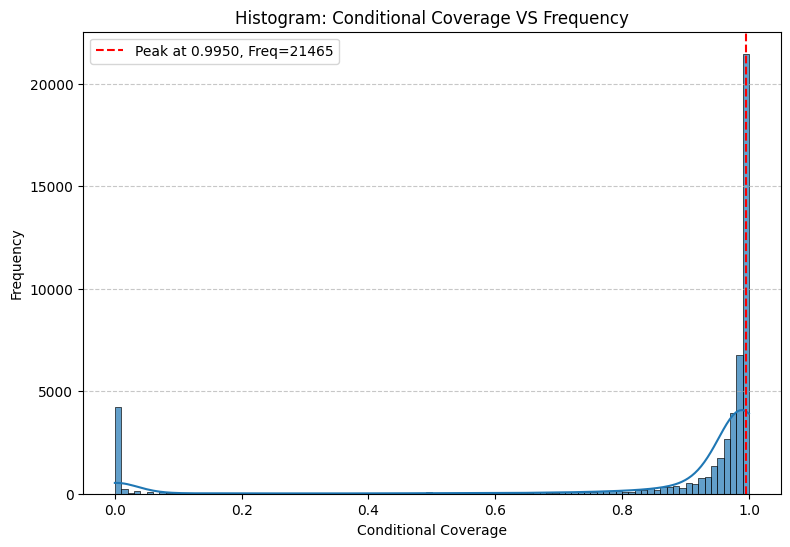

21465 (42.93%) samples reached the peak conditional coverage at 0.9950


In [3]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4739 ± 0.0032
Final Average Prediction Set Size: 1.22 ± 0.02
Final Average Coverage: 0.8950 ± 0.0060
Final Average Real Probability: 0.8658 ± 0.0062


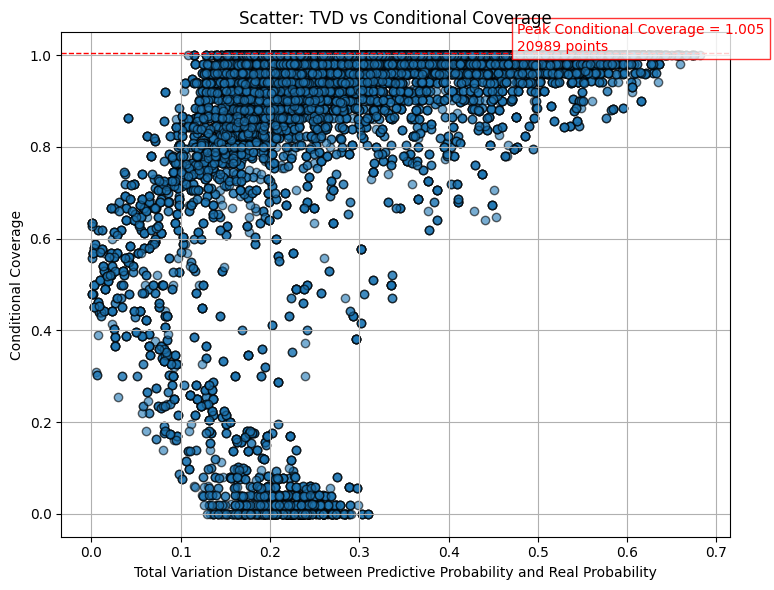

Peak Conditional Coverage = 1.005, with 20989 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.67125']
  Real Probability Set      : ['0.81250']
Sample 2:
  Predictive Probability Set: ['0.69898']
  Real Probability Set      : ['0.82353']
Sample 3:
  Predictive Probability Set: ['0.67125']
  Real Probability Set      : ['0.81250']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.56802']
  Real Probability Set      : ['0.00000']
Sample 2:
  Predictive Probability Set: ['0.52112']
  Real Probability Set      : ['0.00000']
Sample 3:
  Predictive Probability Set: ['0.19869', '0.11295', '0.09664']
  Real Probability Set      : ['0.00000', '0.00000', '0.00000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.27396', '0.10704', '0.10509']
  Real Probability Set      : ['0.76923', '0.00000', '0.00000']
Sample 2:
  Predictive Pro

In [18]:
aps_cifar10h_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4754 ± 0.0035
Final Average Prediction Set Size: 1.18 ± 0.02
Final Average Coverage: 0.8945 ± 0.0067
Final Average Real Probability: 0.8650 ± 0.0071


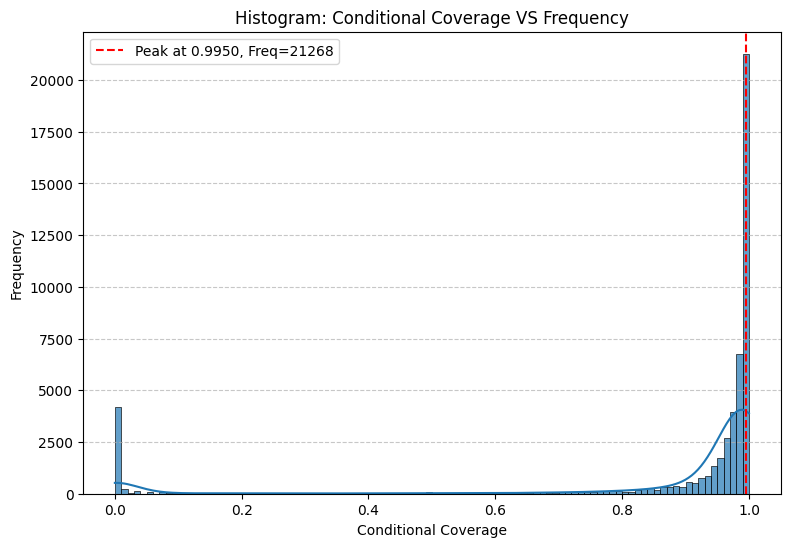

21268 (42.54%) samples reached the peak conditional coverage at 0.9950


In [4]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.01, k_reg=1, num_runs=10, alpha=0.1, is_ground_truth=False)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4754 ± 0.0035
Final Average Prediction Set Size: 1.18 ± 0.02
Final Average Coverage: 0.8945 ± 0.0067
Final Average Real Probability: 0.8650 ± 0.0071


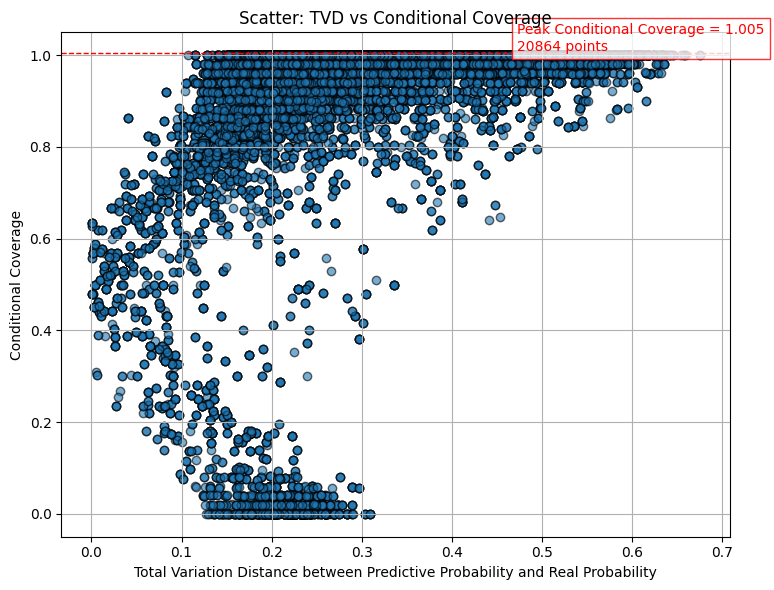

Peak Conditional Coverage = 1.005, with 20864 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.78055']
  Real Probability Set      : ['0.86275']
Sample 2:
  Predictive Probability Set: ['0.78055']
  Real Probability Set      : ['0.86275']
Sample 3:
  Predictive Probability Set: ['0.60489']
  Real Probability Set      : ['0.80392']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.56463']
  Real Probability Set      : ['0.11765']
Sample 2:
  Predictive Probability Set: ['0.54889']
  Real Probability Set      : ['0.00000']
Sample 3:
  Predictive Probability Set: ['0.61858']
  Real Probability Set      : ['0.00000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.35702', '0.18003']
  Real Probability Set      : ['0.08000', '0.70000']
Sample 2:
  Predictive Probability Set: ['0.37524', '0.12749']
  Real Probability Set      :

In [19]:
raps_cifar10h_scatter(model,dataset,device, lambda_=0.01, k_reg=1, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5129 ± 0.0035
Final Average Prediction Set Size: 0.98 ± 0.01
Final Average Coverage: 0.8992 ± 0.0063
Final Average Real Probability: 0.8675 ± 0.0065


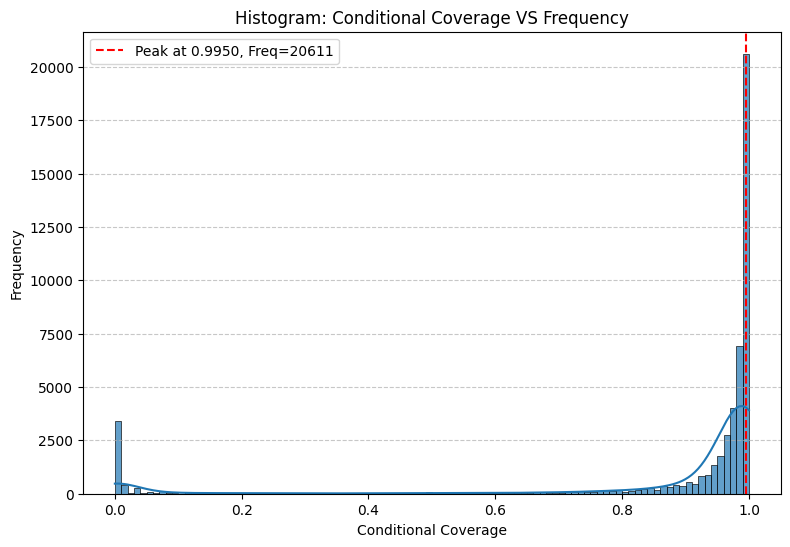

20611 (41.22%) samples reached the peak conditional coverage at 0.9950


In [3]:
saps_cifar10h_hist(model, dataset, device, lambda_=2.5, num_runs=10, alpha=0.1, is_ground_truth=False)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5129 ± 0.0035
Final Average Prediction Set Size: 0.98 ± 0.01
Final Average Coverage: 0.8992 ± 0.0063
Final Average Real Probability: 0.8675 ± 0.0065


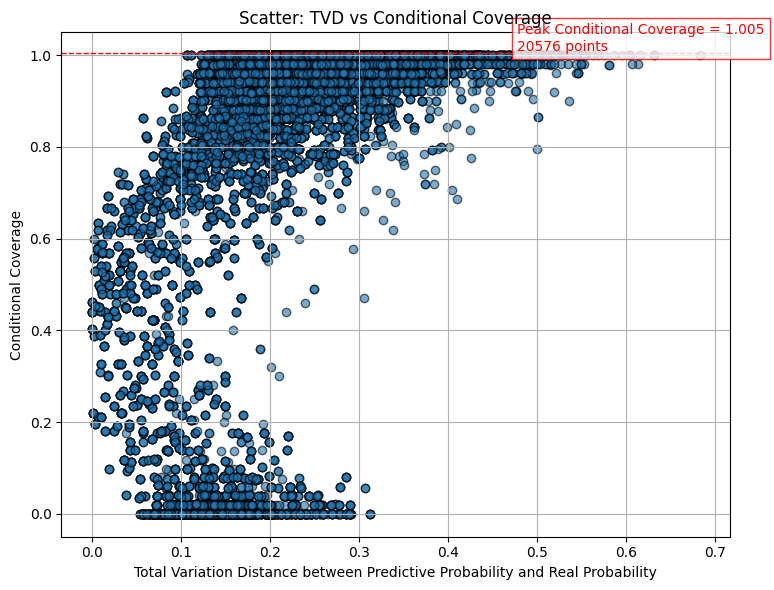

Peak Conditional Coverage = 1.005, with 20576 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.69486']
  Real Probability Set      : ['0.82000']
Sample 2:
  Predictive Probability Set: ['0.65911']
  Real Probability Set      : ['0.82353']
Sample 3:
  Predictive Probability Set: ['0.70103']
  Real Probability Set      : ['0.88462']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.66968']
  Real Probability Set      : ['0.05660']
Sample 2:
  Predictive Probability Set: ['0.41678']
  Real Probability Set      : ['0.00000']
Sample 3:
  Predictive Probability Set: ['0.46934']
  Real Probability Set      : ['0.00000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.27470', '0.13400']
  Real Probability Set      : ['0.00000', '0.47059']
Sample 2:
  Predictive Probability Set: ['0.28854', '0.17167']
  Real Probability Set      :

In [4]:
saps_cifar10h_scatter(model, dataset, device, lambda_=2.5, num_runs=10, alpha=0.1)